In [ ]:
# Q-1. Construct a deterministic finite automaton (DFA) that recognizes valid simplified English
# words. An English word, for this problem, is defined as a string that:
# ● Starts with an lowercase letter
# ● Followed by zero or more lowercase letters
# That is, the string must:
# ● Not start with a digit or punctuation
# ● Not contain uppercase letters after the first character
# ● Not contain spaces, digits, or special characters
# Output Format:
# If a string is accepted, output Accepted else Not Accepted.
# ● Accepted: cat, dog, a, zebra
# Not Accepted: dog1, 1dog, DogHouse, Dog_house, cats (starts with a space)
# For visualizing the DFA, you can use https://pypi.org/project/visual-automata/ or
# https://github.com/rohaquinlop/automathon

In [16]:
!pip install coloraide

In [12]:
import sys
!{sys.executable} -m pip install coloraide pygraphviz

In [5]:
from visual_automata.fa.dfa import DFA


In [6]:

# Define DFA
dfa = DFA(
    states={"q0", "q1", "q_dead"},
    input_symbols=set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "),
    transitions={
        "q0": {ch: "q1" if ch.islower() else "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "},
        "q1": {ch: "q1" if ch.islower() else "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "},
        "q_dead": {ch: "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "}
    },
    initial_state="q0",
    final_states={"q1"},
)

test_words = ["cat", "dog", "A", "zebra", "dog1", "1dog", "DogHouse", "Dog_house", " cats"]

for word in test_words:
    result = "Accepted" if dfa.accepts_input(word.strip()) else "Not Accepted"
    print(f"{word} = {result}")

cat = Accepted
dog = Accepted
A = Not Accepted
zebra = Accepted
dog1 = Not Accepted
1dog = Not Accepted
DogHouse = Not Accepted
Dog_house = Not Accepted
 cats = Accepted


cat = Accepted
dog = Accepted
A = Not Accepted
zebra = Accepted
dog1 = Not Accepted
1dog = Not Accepted
DogHouse = Not Accepted
Dog_house = Not Accepted
 cats = Accepted


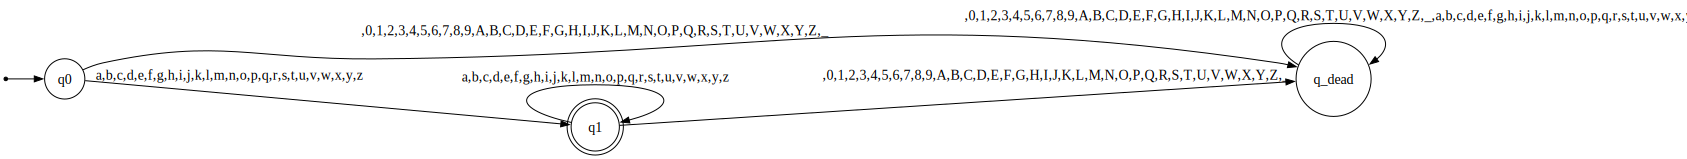

In [1]:
from visual_automata.fa.dfa import DFA

dfa = DFA(
    states={"q0", "q1", "q_dead"},
    input_symbols=set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "),
    transitions={
        "q0": {ch: "q1" if ch.islower() else "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "},
        "q1": {ch: "q1" if ch.islower() else "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "},
        "q_dead": {ch: "q_dead" for ch in "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_ "}
    },
    initial_state="q0",
    final_states={"q1"},
)

# Test the DFA
test_words = ["cat", "dog", "A", "zebra", "dog1", "1dog", "DogHouse", "Dog_house", " cats"]
for word in test_words:
    result = "Accepted" if dfa.accepts_input(word.strip()) else "Not Accepted"
    print(f"{word} = {result}")

# ✅ Visualize the DFA
dfa.show_diagram()

In [ ]:
# Q2. You are given all the nouns from the brown corpus (brown_nouns.txt). You need to
# design a finite state transducer (FST) to generate the morph/grammatical features for
# every word in the corpus. Your output should look like the following:
# foxes = fox+N+PL (can be generalized as root+category+number)
# fox = fox+N+SG [where SG->Singular, PL->Plural, N->Noun]
# You need to take the following properties:
# Name                                      Rule Description                                                   Example
# E insertion                    e is added after -s, -z, -x,-ch, -sh before -s is added             watch/watches, fox/foxes
# Y replacement                      -y changes to -ie before -s                                           try/tries
# S addition                           -s is added at the end                                              bag/bags
# You need to ensure that incorrect words are not generated. You return an output “Invalid
# Word” in that case. Example: foxs = “Invalid Word”

In [2]:
with open("/Users/akshdharodiya/Desktop/sem5_lab_practical/NLP_LAB/NLP_LAB_2_06_08_25/brown_nouns.txt", "r") as f:
    nouns = [line.strip() for line in f if line.strip()]
    

In [3]:
# Step 3: Write a Function to Generate Root + Feature Format
import re

def analyze_noun(word):
    # E-insertion
    if re.match(r'.*(s|x|z|ch|sh)es$', word):
        root = re.sub(r'es$', '', word)
        return f"{root}+N+PL"
    
    # Y replacement
    elif re.match(r'.*ies$', word):
        root = re.sub(r'ies$', 'y', word)
        return f"{root}+N+PL"
    
    # Simple s-addition
    elif re.match(r'.+s$', word) and not re.match(r'.*(ss|us|is|os|as)s$', word):
        root = re.sub(r's$', '', word)
        return f"{root}+N+PL"
    
    # Singular word (assume singular if not ending with s)
    elif not word.endswith('s'):
        return f"{word}+N+SG"
    
    else:
        return "Invalid Word"

In [4]:
for noun in nouns:
    print(f"{noun} => {analyze_noun(noun)}")

investigation => investigation+N+SG
primary => primary+N+SG
election => election+N+SG
evidence => evidence+N+SG
irregularities => irregularity+N+PL
place => place+N+SG
jury => jury+N+SG
presentments => presentment+N+PL
charge => charge+N+SG
election => election+N+SG
praise => praise+N+SG
thanks => thank+N+PL
manner => manner+N+SG
election => election+N+SG
term => term+N+SG
jury => jury+N+SG
reports => report+N+PL
irregularities => irregularity+N+PL
primary => primary+N+SG
handful => handful+N+SG
reports => report+N+PL
jury => jury+N+SG
interest => interest+N+SG
election => election+N+SG
number => number+N+SG
voters => voter+N+PL
size => size+N+SG
city => city+N+SG
jury => jury+N+SG
registration => registration+N+SG
election => election+N+SG
laws => law+N+PL
legislators => legislator+N+PL
laws => law+N+PL
end => end+N+SG
jury => jury+N+SG
number => number+N+SG
topics => topic+N+PL
departments => department+N+PL
practices => practice+N+PL
interest => interest+N+SG
governments => governme

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

